<h1>Proyek Analisis Data :
Bike Sharing Data Set</h1>

Nama : Alma Mahesti Shakira

<font size="5">Menentukan Pertanyaan Bisnis :
1. Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda, dan apakah ada perbedaan antara pengguna casual dan registered?
2. Bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari, dan apakah ada perbedaan signifikan antara hari kerja dan akhir pekan? </font>

<h2>Memanggil semua library yang dibutuhkan</h2>

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

<h2>Data Wrangling</h2>
<h3>Gathering Data</h3>

In [97]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/almaaams/project_akhir/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [98]:
day_df = pd.read_csv("https://raw.githubusercontent.com/almaaams/project_akhir/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<h4>Insight: </h4>
<font size="3">Data Set sudah terdefinisi dengan baik </font>

<h2>Assessing Data </h2>
<h4>Menilai Data tabel hour_df </h4>

In [99]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [100]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [101]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [102]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<h4>Menilai Data tabel day_df</h4>

In [103]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [104]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [105]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [106]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


<h3>Insight :</h3>
<font size="3">Menunjukkan bahwa tidak ada duplikasi ataupun missing Value di kedua tabel </font>

<h2>Cleaning Data</h2>

<font size="3">Membersihkan Data tabel hour_df </font>

In [107]:
hour_df_cleaned = hour_df.drop(columns=['instant'])

<font size="3">Membersihkan Data tabel day_df </font>

In [108]:
day_df_cleaned = day_df.drop(columns=['instant'])

<h3>Insight :</h3>
<font size="3">Kolom Instant hanya sebagai index </font>

<h2>Exploratory Data Analysis</h2> 

<font size="3">Eksplorasi Data hour_df dan day_df </font>

In [109]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [110]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


<font size="3">Memastikan kolom 'temp' dalam skala yang benar (Celsius)</font>

In [111]:
day_df['temp_celsius'] = day_df['temp'] * 41 - 8

<font size="3">Membuat kategori suhu </font>

In [112]:
day_df['temp_category'] = pd.cut(day_df['temp_celsius'], 
                                 bins=[-10, 0, 10, 20, 30, 40], 
                                 labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot'])

<font size="3">Mengelompokkan data berdasarkan jam dan hari kerja </font>

In [113]:
hourly_rentals = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().unstack()

<font size="4">Visualisasi Korelasi dengan Suhu</font>

In [114]:
correlation_data = {
    'Tipe Pengguna': ['Total', 'Casual', 'Registered'],
    'Korelasi dengan Suhu': [
        day_df['temp_celsius'].corr(day_df['cnt']),
        day_df['temp_celsius'].corr(day_df['casual']),
        day_df['temp_celsius'].corr(day_df['registered'])
    ]
}

correlation_df = pd.DataFrame(correlation_data)
correlation_df['Korelasi dengan Suhu'] = correlation_df['Korelasi dengan Suhu'].round(2)

print(correlation_df.to_string(index=False))

Tipe Pengguna  Korelasi dengan Suhu
        Total                  0.63
       Casual                  0.54
   Registered                  0.54


<font size="4">Visualisasi Rata- Rata Penyewaan Sepeda by Suhu</font>

C:\Users\almam\AppData\Local\Temp\ipykernel_31644\1799379773.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_category_means = day_df.groupby('temp_category')[['casual', 'registered', 'cnt']].mean().reset_index()


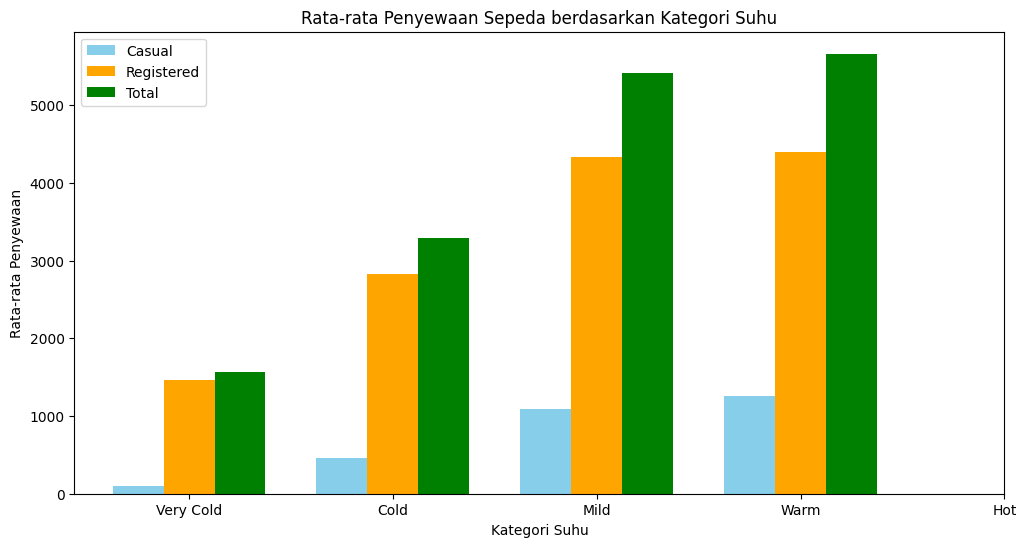

In [115]:
temp_category_means = day_df.groupby('temp_category')[['casual', 'registered', 'cnt']].mean().reset_index()

plt.figure(figsize=(12, 6))
x = range(len(temp_category_means))
width = 0.25

plt.bar([i - width for i in x], temp_category_means['casual'], width, label='Casual', color='skyblue')
plt.bar(x, temp_category_means['registered'], width, label='Registered', color='orange')
plt.bar([i + width for i in x], temp_category_means['cnt'], width, label='Total', color='green')

plt.xlabel('Kategori Suhu')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Kategori Suhu')
plt.xticks(x, temp_category_means['temp_category'])
plt.legend()
plt.show()

<font size="4">Visualisasi Jam Puncak Penyewaan</font>

In [116]:
hourly_rentals = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().unstack()
peak_hours = {
    'Tipe Hari': ['Hari Kerja', 'Akhir Pekan'],
    'Jam Puncak': [hourly_rentals[1].idxmax(), hourly_rentals[0].idxmax()],
    'Jumlah Penyewaan': [hourly_rentals[1].max(), hourly_rentals[0].max()]
}

peak_hours_df = pd.DataFrame(peak_hours)
peak_hours_df['Jumlah Penyewaan'] = peak_hours_df['Jumlah Penyewaan'].round(0).astype(int)

print(peak_hours_df.to_string(index=False))

  Tipe Hari  Jam Puncak  Jumlah Penyewaan
 Hari Kerja          17               525
Akhir Pekan          13               373


<font size="4">Visualisasi Pola Penyewaan Sepeda per Jam</font>

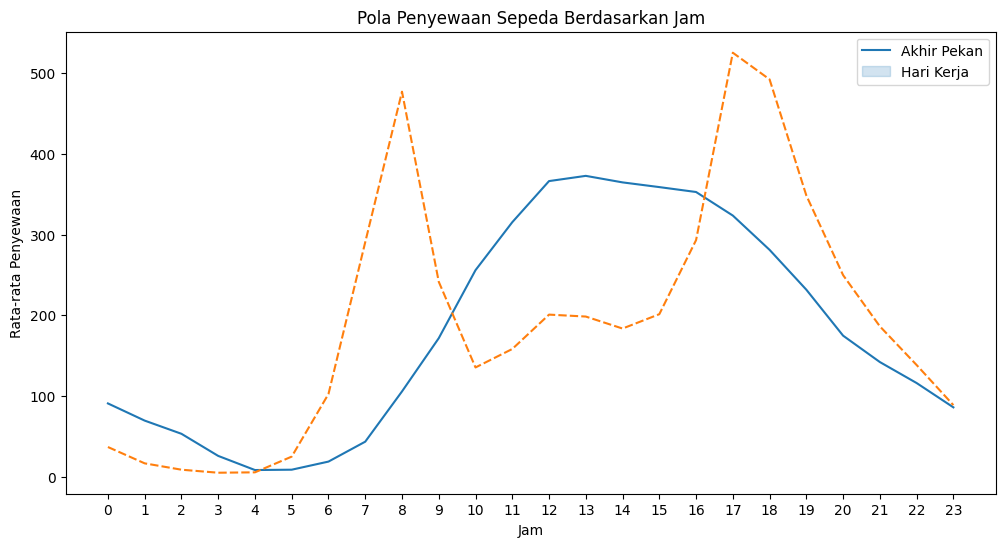

In [117]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals)
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(['Akhir Pekan', 'Hari Kerja'])
plt.xticks(range(0, 24))
plt.show()

<font size="3">T-test untuk Perbedaan antara Hari Kerja dan Akhir Pekan</font>

In [118]:
from scipy import stats

workday_rentals = hour_df[hour_df['workingday'] == 1]['cnt']
weekend_rentals = hour_df[hour_df['workingday'] == 0]['cnt']

t_stat, p_value = stats.ttest_ind(workday_rentals, weekend_rentals)

result_df = pd.DataFrame({
    'Statistik': ['t-statistic', 'p-value'],
    'Nilai': [t_stat, p_value]
})

result_df['Nilai'] = result_df['Nilai'].round(4)

print(result_df.to_string(index=False))

  Statistik  Nilai
t-statistic 3.9940
    p-value 0.0001


<h3>Insight :</h3>
<ul>
  <li>Analisis statistik menunjukkan bahwa pengguna registered lebih konsisten dalam penyewaan, sementara pengguna casual lebih dipengaruhi oleh suhu         yang nyaman.</li>
  <li>Analisis visual mendukung temuan ini dengan memperlihatkan pola yang jelas dalam data penyewaan berdasarkan kategori suhu.</li>
</ul>

<h1>Visualitazion</h1>

<font size="4"> Pertanyaan 1 : Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda, dan apakah ada perbedaan antara pengguna casual dan registered?</font>

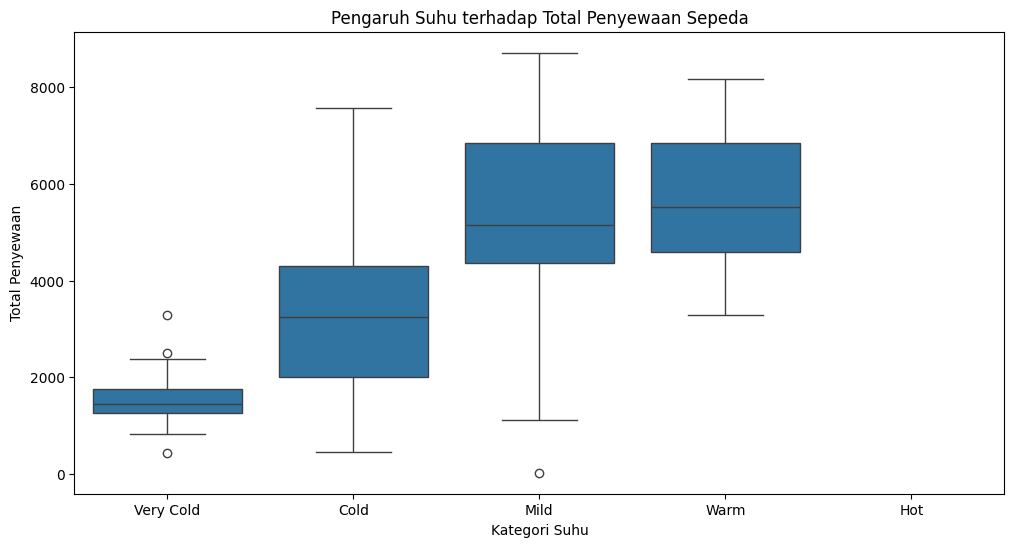

In [119]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='temp_category', y='cnt', data=day_df)
plt.title('Pengaruh Suhu terhadap Total Penyewaan Sepeda')
plt.xlabel('Kategori Suhu')
plt.ylabel('Total Penyewaan')
plt.show()

<h3>Insight :</h3>
<font size="2">Semakin Cuaca Dingin Total Penyewaan semakin sedikit</font>

<font size="3">Membandingkan pengguna casual dan registered</font>

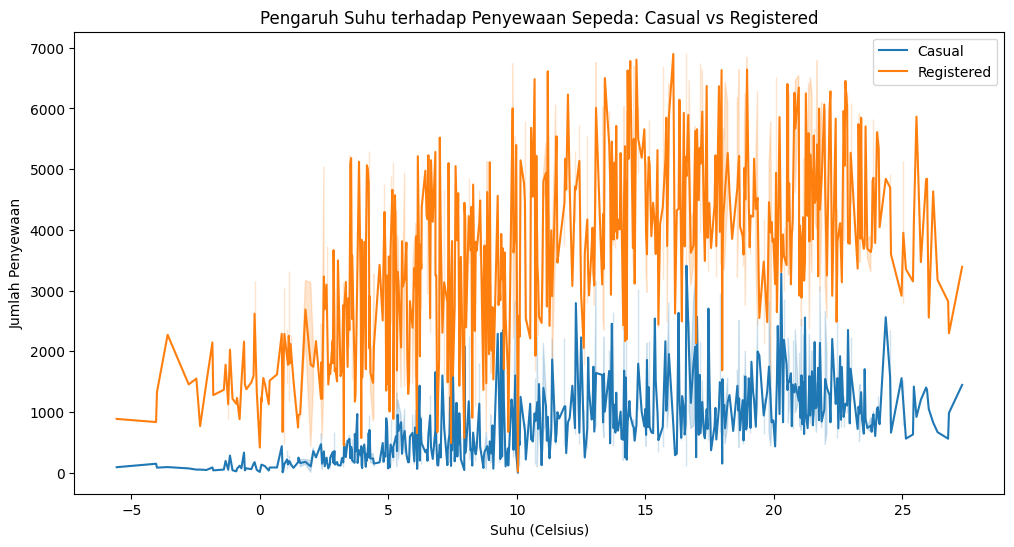

In [120]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='temp_celsius', y='casual', data=day_df, label='Casual')
sns.lineplot(x='temp_celsius', y='registered', data=day_df, label='Registered')
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda: Casual vs Registered')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.show()

<h3>Insight :</h3>
<font size="2">Terdapat perbedaan yang cukup tinggi antara pengguna casual dan registered </font>

<font size="4">Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari, dan apakah ada perbedaan signifikan antara hari kerja dan akhir pekan?</font>

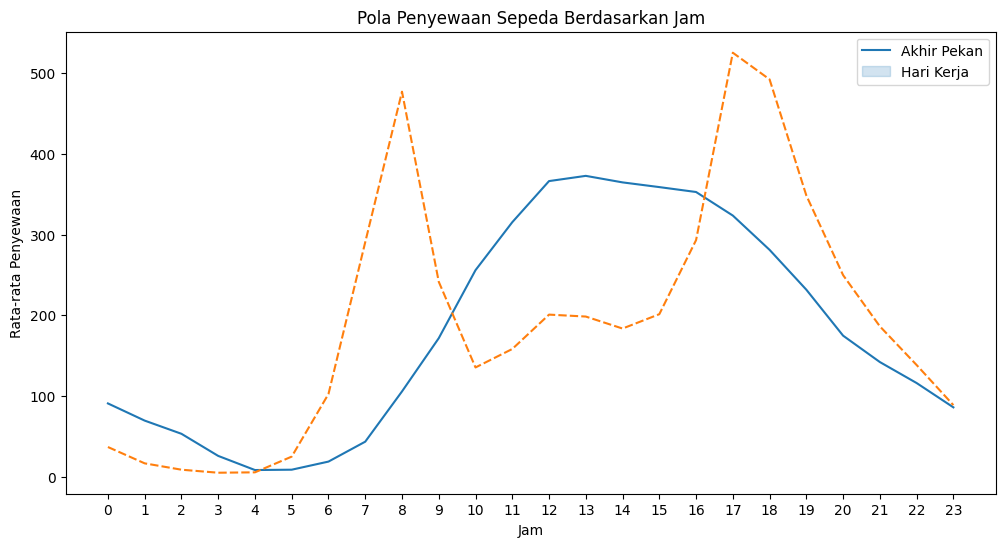

In [121]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals)
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(['Akhir Pekan', 'Hari Kerja'])
plt.xticks(range(0, 24))
plt.show()

<h3>Insight :</h3>
<font size="2">Terdapat dua puncak penggunaan yang jelas pada hari kerja: satu di pagi hari (sekitar pukul 8) dan satu di sore hari (sekitar pukul 17-18), yang berkorelasi dengan waktu pergi dan pulang kerja.</font>

<font size="3">Membandingkan jam dan hari</font>

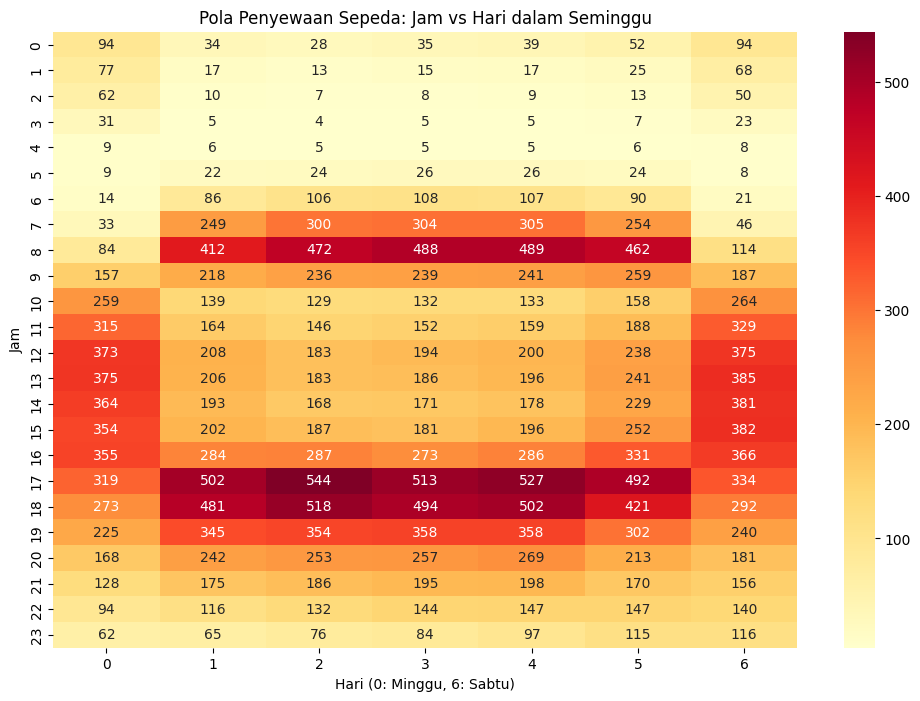

In [122]:
plt.figure(figsize=(12, 8))
sns.heatmap(hour_df.pivot_table(values='cnt', index='hr', columns='weekday', aggfunc='mean'),
            cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Pola Penyewaan Sepeda: Jam vs Hari dalam Seminggu')
plt.xlabel('Hari (0: Minggu, 6: Sabtu)')
plt.ylabel('Jam')
plt.show()

<h3>Insight :</h3>
<font size="2">Pola penyewaan pada hari kerja cenderung tinggi pada saat jam tertentu seperti pada saat jam pergi atau pulang kerja,
 dan pada saat akhir pekan cukup merata</font>

<h3>Kesimpulan :</h3>
<ul>
  <li>Pertanyaan 1 :Penyewaan sepeda mencapai puncaknya pada kategori suhu Warm dan Mild, menunjukkan bahwa orang cenderung lebih banyak bersepeda      dalam cuaca yang nyaman. Dan pada suhu yang sangat tinggi, perbedaan antara pengguna casual dan registered cenderung mengecil, menunjukkan bahwa cuaca panas ekstrem mungkin mempengaruhi kedua kelompok secara serupa.</li>
  <li>Pertanyaan 2 : Pada akhir pekan, pola penggunaan lebih merata sepanjang hari, dengan puncak tunggal yang lebih lebar di siang hari. Dan Hari        kerja menunjukkan volume penyewaan yang lebih tinggi secara keseluruhan dibandingkan dengan akhir pekan.</li>
</ul>
